In [2]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from random import uniform as ui
from thinfilm_v5 import sec_reflc as sr

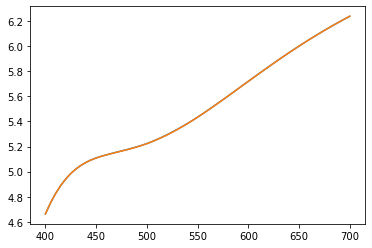

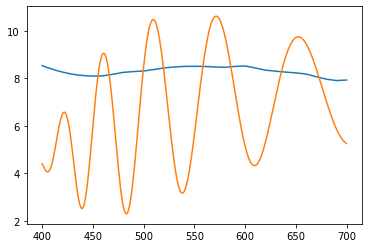

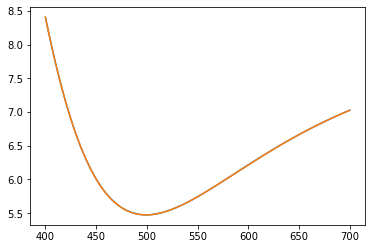

2.0740109876960378
2.798181442622951


In [12]:
R_scan = pd.read_csv('./Nanya/Nanya_5_bt.csv')['SCAN'][20:-80]
nanya = pd.read_csv('./Nanya/Nanya_sim.csv')
nyw = nanya['nm'].values
ny_dia = nanya['R_dia'].values
ny_tra = nanya['R_tra'].values
ny_bri = nanya['R_bri'].values


wl = np.linspace(400, 700, 301)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
ITO1 = ml.open_material('ITO1_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime = ml.open_material('sodalime_Nanya', 'Material')
air = ml.Non_Dispersion(1)


bri = tm.Design(
    [air, SiO2, ITO2, OC, ITO1, SiO2, NB, sodalime],
    [None, 76, 30, 1465, 75, 45.3, 7.8,None]
)

dia = tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime],
    [None, 76, 30, 45.3, 7.8, None]
)

tra = tm.Design(
    [air, SiO2, SiO2, NB, sodalime],
    [None, 76, 45.3, 7.8,None]
)


plt.plot(nyw, ny_dia)
plt.plot(wl, 100*sr(dia, wl))
plt.show()

plt.plot(nyw, ny_bri)
plt.plot(wl, 100*sr(bri, wl))
plt.show()

plt.plot(nyw, ny_tra)
plt.plot(wl, 100*sr(tra, wl))
plt.show()

print(np.mean(abs(100*sr(dia, wl)-100*sr(bri, wl))))
print(np.mean(abs(ny_dia-ny_bri)))

pd.DataFrame({'wl':wl, 'bridge':ny_dia})

In [23]:
tk1 = [None, 76, 27, 1465, 75, 45.3, 7.7,None]
tku = [None, 80, 32, 1650, 75, 50, 10,None]
tkd = [None, 70, 28, 1350, 65, 40, 6,None]


bri = lambda thickness: tm.Design(
    [air, SiO2, ITO, OC, ITO, SiO2, NB, sodalime],
    thickness
).reflectance(wl)

dia0 = lambda thickness: tm.Design(
    [air, SiO2, ITO, SiO2, NB, sodalime],
    thickness[0:3] + thickness[5:]
).reflectance(wl)

tra = lambda thickness: tm.Design(
    [air, SiO2, SiO2, NB, sodalime],
    thickness[0:2] + thickness[5:]
).reflectance(wl)


dia05 = lambda thickness: tm.Design(
    [air, SiO2, ITO, SiO2, NB, sodalime],
    thickness[0:3] + thickness[5:]
).reflectance(wl)

dia15 = lambda thickness: tm.Design(
    [air, SiO2, ITO, SiO2, NB, sodalime],
    thickness[0:3] + thickness[5:]
).reflectance(wl, 15)

dia30 = lambda thickness: tm.Design(
    [air, SiO2, ITO, SiO2, NB, sodalime],
    thickness[0:3] + thickness[5:]
).reflectance(wl, 30)

dia45 = lambda thickness: tm.Design(
    [air, SiO2, ITO, SiO2, NB, sodalime],
    thickness[0:3] + thickness[5:]
).reflectance(wl, 45)

plt.plot(wl, 100*bri(tk1), '-r', label = 'bridge')
plt.plot(wl, 100*dia05(tk1), '-k', label = 'XY-ITO_diamond')
plt.plot(wl, 100*tra(tk1), '-b', label = 'trace_pattern')
#plt.plot(wl, R_scan/100, '--k')
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
#plt.plot(nyw, nyr/100)
#plt.savefig('Bonsai.png')
plt.show()

#delta_d_b = lambda tk: np.mean(abs(bri(tk)-dia(tk)))
#delta_d_t = lambda tk: np.mean(abs(tra(tk)-dia(tk)))
#print(delta_d_b(tk1))
#print(delta_d_t(tk1))

NameError: name 'ITO' is not defined

In [ ]:
plt.plot(wl, bri(tku), '-r', label = 'bridge')
plt.plot(wl, dia(tku), '-k', label = 'ITO')
plt.plot(wl, tra(tku), '-b', label = 'pattern')
plt.legend(loc = 'best')
plt.show()
print(delta_d_b(tku))
print(delta_d_t(tku))

In [ ]:
plt.plot(wl, bri(tkd), '-r', label = 'bridge')
plt.plot(wl, dia(tkd), '-k', label = 'ITO')
plt.plot(wl, tra(tkd), '-b', label = 'pattern')
plt.legend(loc = 'best')
plt.show()
print(delta_d_b(tkd))
print(delta_d_t(tkd))